In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("assignment_dat.csv")

In [3]:
df

Age  Annual Income (k$)  Purchase Frequency  Average Purchase Value ($)  \
0      56                 112                  23                          94   
1      69                 191                  26                         414   
2      46                  43                  29                         223   
3      32                  79                  33                         182   
4      60                 141                  27                         400   
...   ...                 ...                 ...                         ...   
1995   63                 131                  34                         109   
1996   67                  75                  10                          87   
1997   69                 198                  35                         281   
1998   24                 184                  11                         348   
1999   20                 164                  11                         171   

      Years as Customer  Number of Returns  Customer Loyalty Score  \
0                    12                  9                4.801262   
1                    14                  4                8.156655   
2                     6                  0                0.627222   
3                    13                  1                8.154878   
4                     4                  7                4.947542   
...                 ...                ...                     ...   
1995                  8                  9                7.134574   
1996                  2                  2                9.262082   
1997                 11                  9                0.884376   
1998                  7                  6                9.543694   
1999                  6                  3                9.213230   

     Predicted Review  
0                Good  
1                Good  
2                Good  
3             Neutral  
4                Good  
...               ...  
1995             Good  
1996          Neutral  
1997          Neutral  
1998             Good  
1999          Neutral  

[2000 rows x 8 columns]

In [4]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         2000 non-null   int64  
 1   Annual Income (k$)          2000 non-null   int64  
 2   Purchase Frequency          2000 non-null   int64  
 3   Average Purchase Value ($)  2000 non-null   int64  
 4   Years as Customer           2000 non-null   int64  
 5   Number of Returns           2000 non-null   int64  
 6   Customer Loyalty Score      2000 non-null   float64
 7   Predicted Review            2000 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 125.1+ KB
None
               Age  Annual Income (k$)  Purchase Frequency  \
count  2000.000000         2000.000000         2000.000000   
mean     43.805500          111.942000           25.372000   
std      14.929203           52.653146           14.170392   
min    

# Data Exploration and Visualization

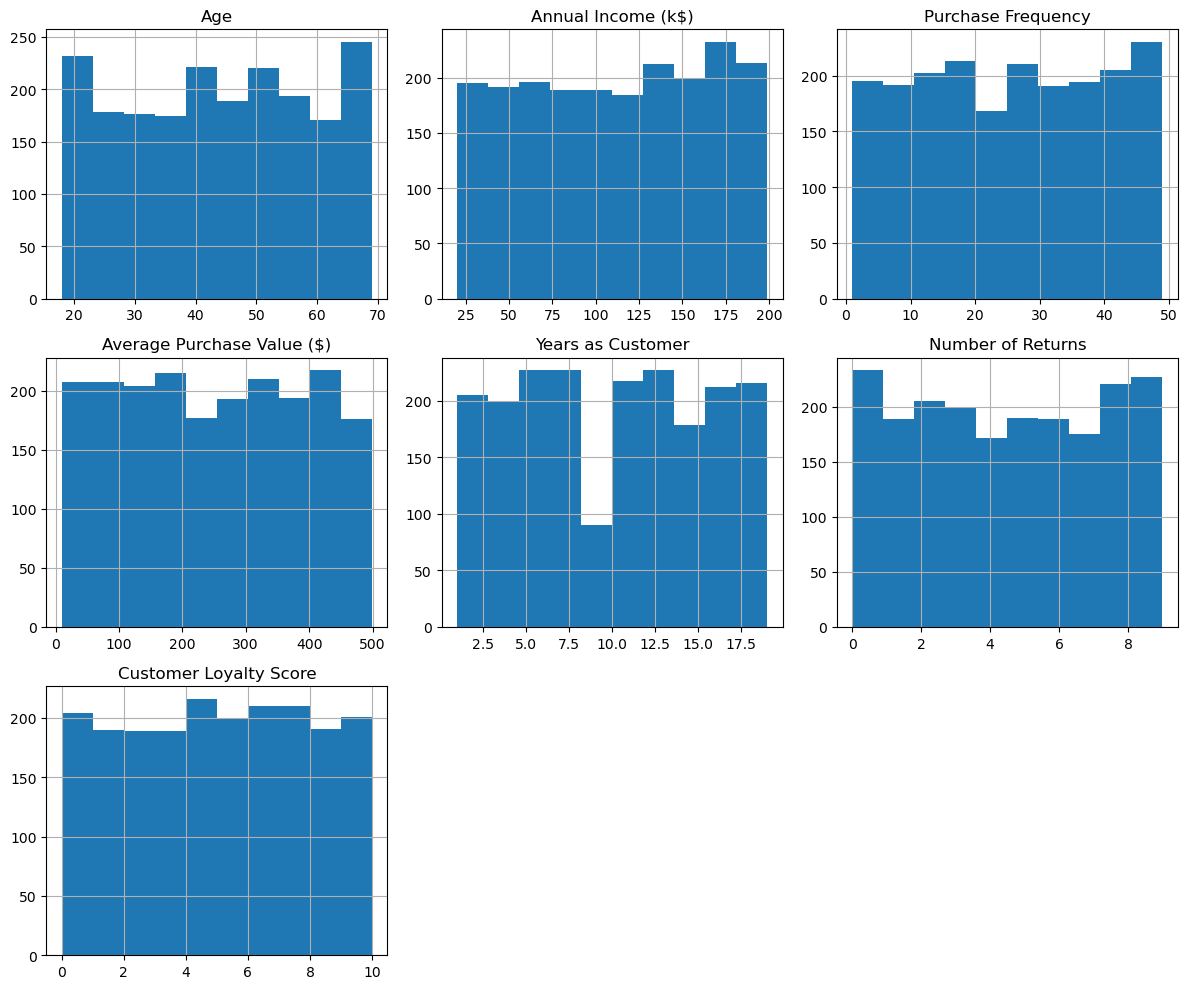

In [5]:
# Distribution Analysis
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

C:\Users\engrd\AppData\Local\Temp\ipykernel_9388\556179171.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


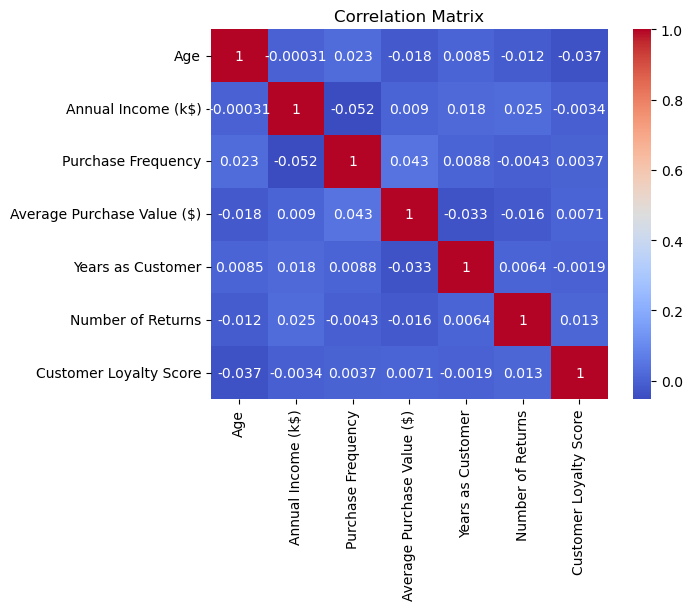

In [6]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

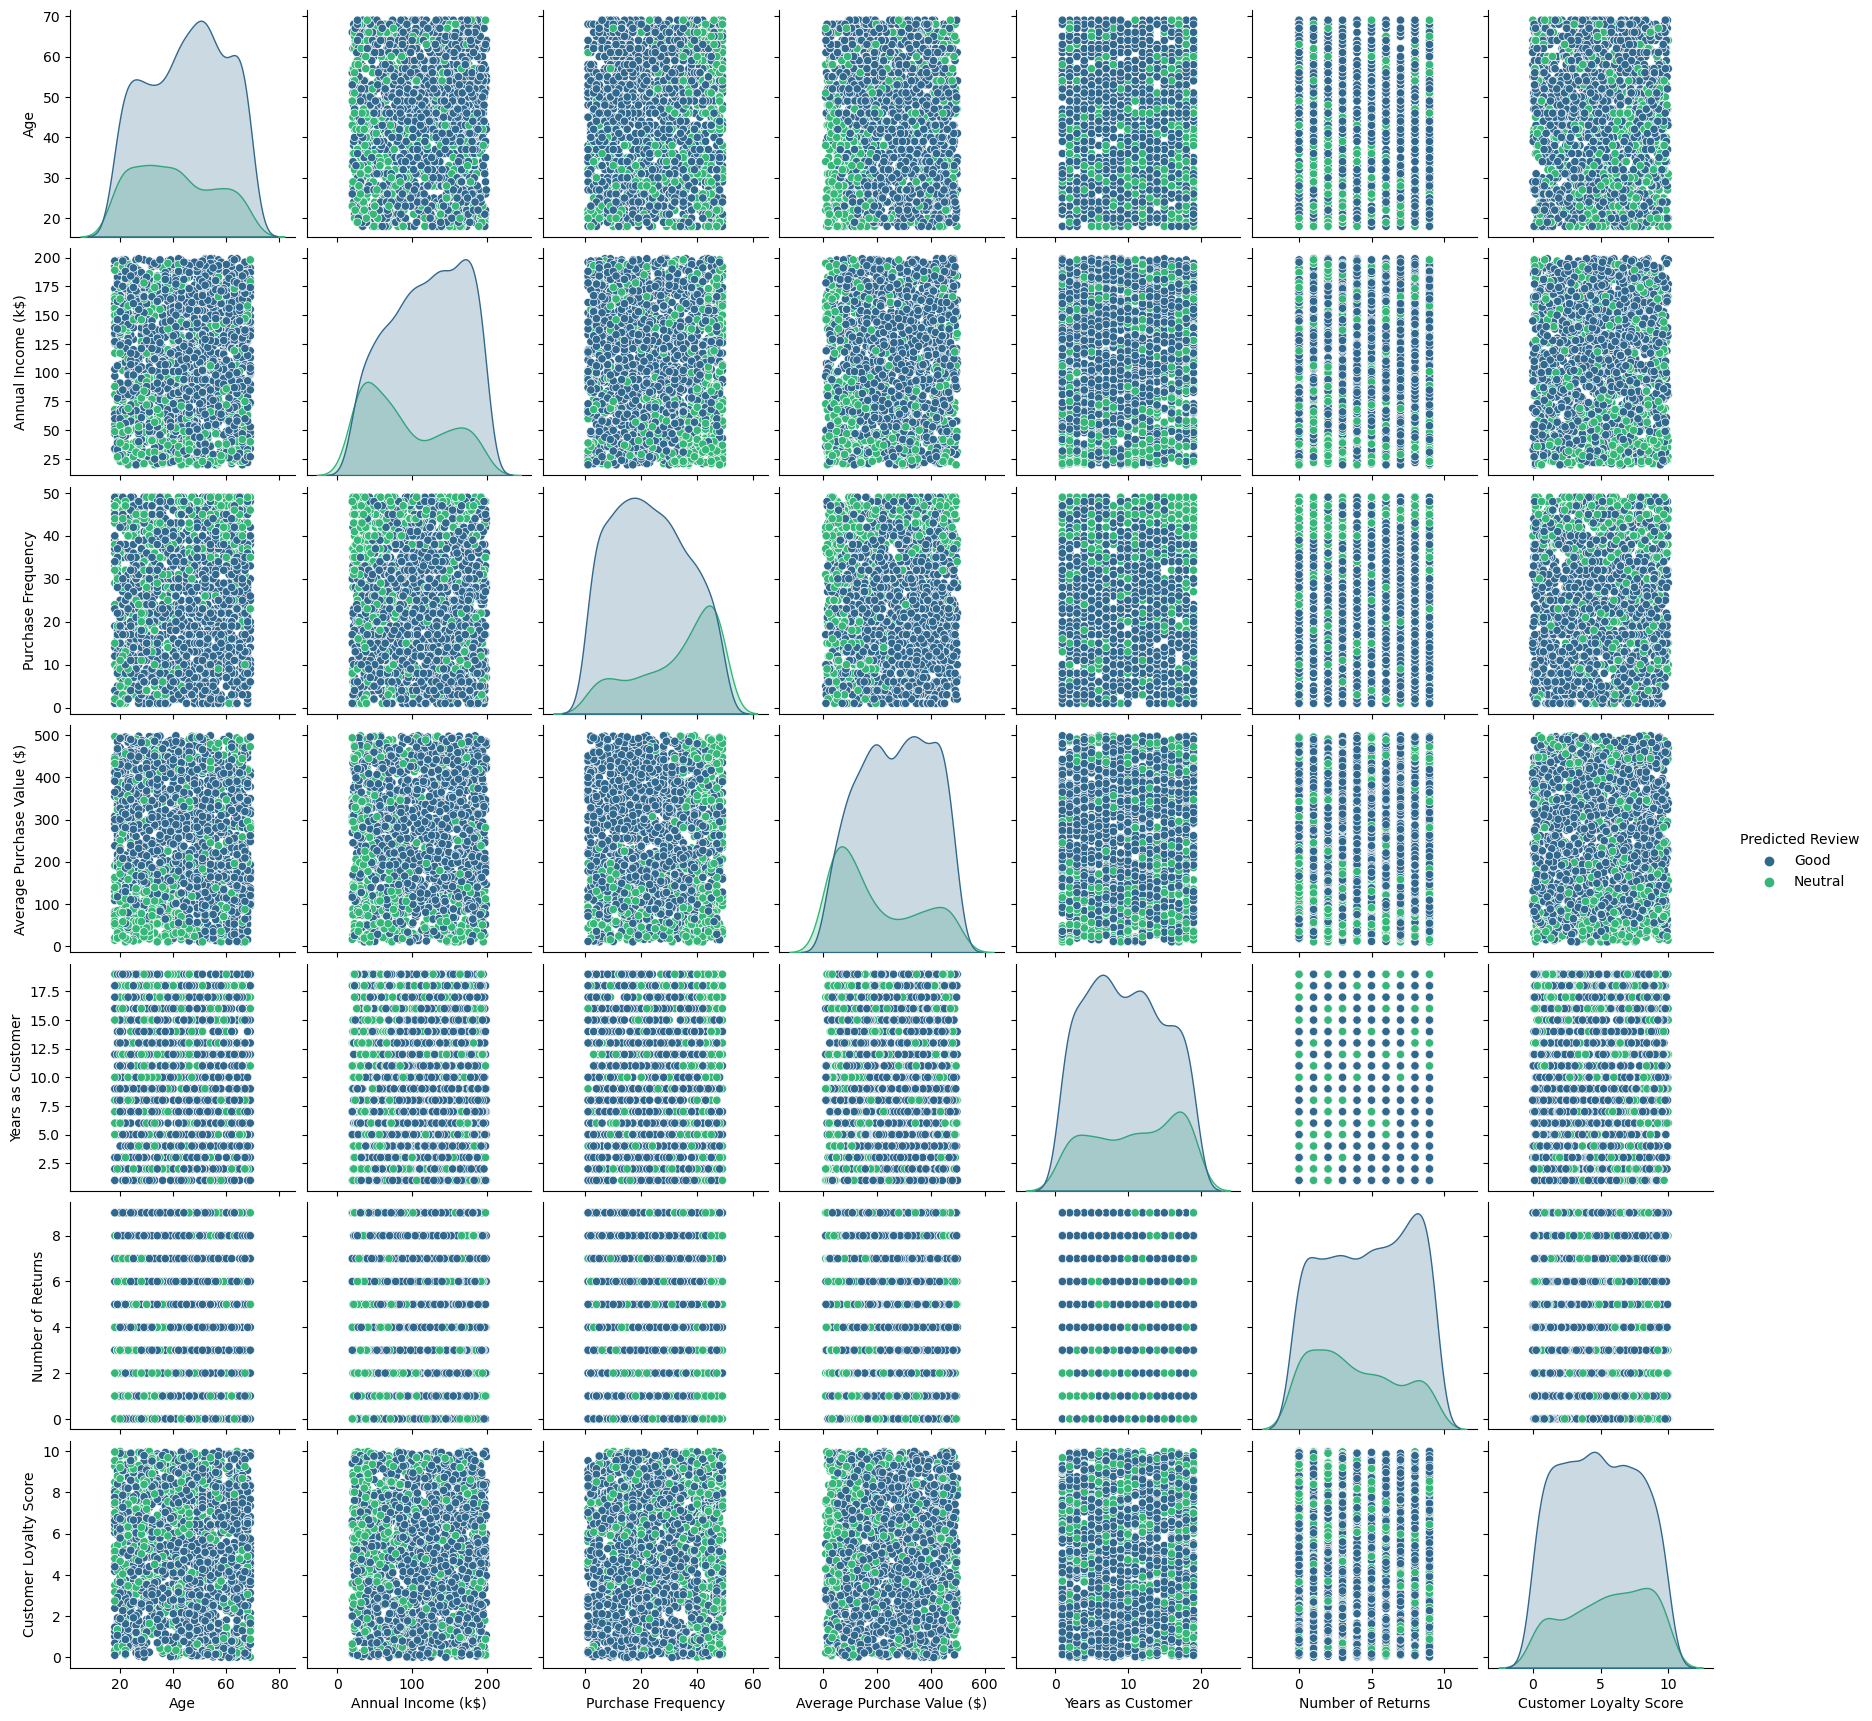

In [7]:
# Pair Plots
sns.pairplot(df, hue='Predicted Review', palette='viridis')
plt.show()

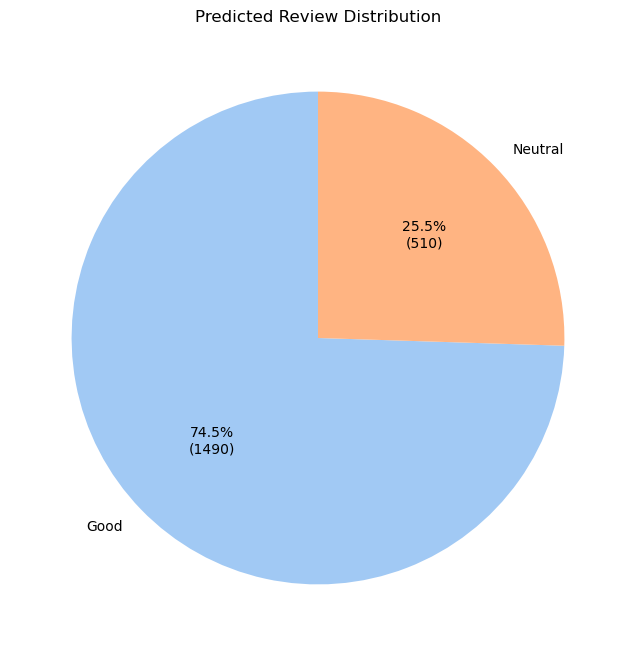

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each predicted review category
review_counts = df['Predicted Review'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(review_counts) / 100),
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Predicted Review Distribution')
plt.show()


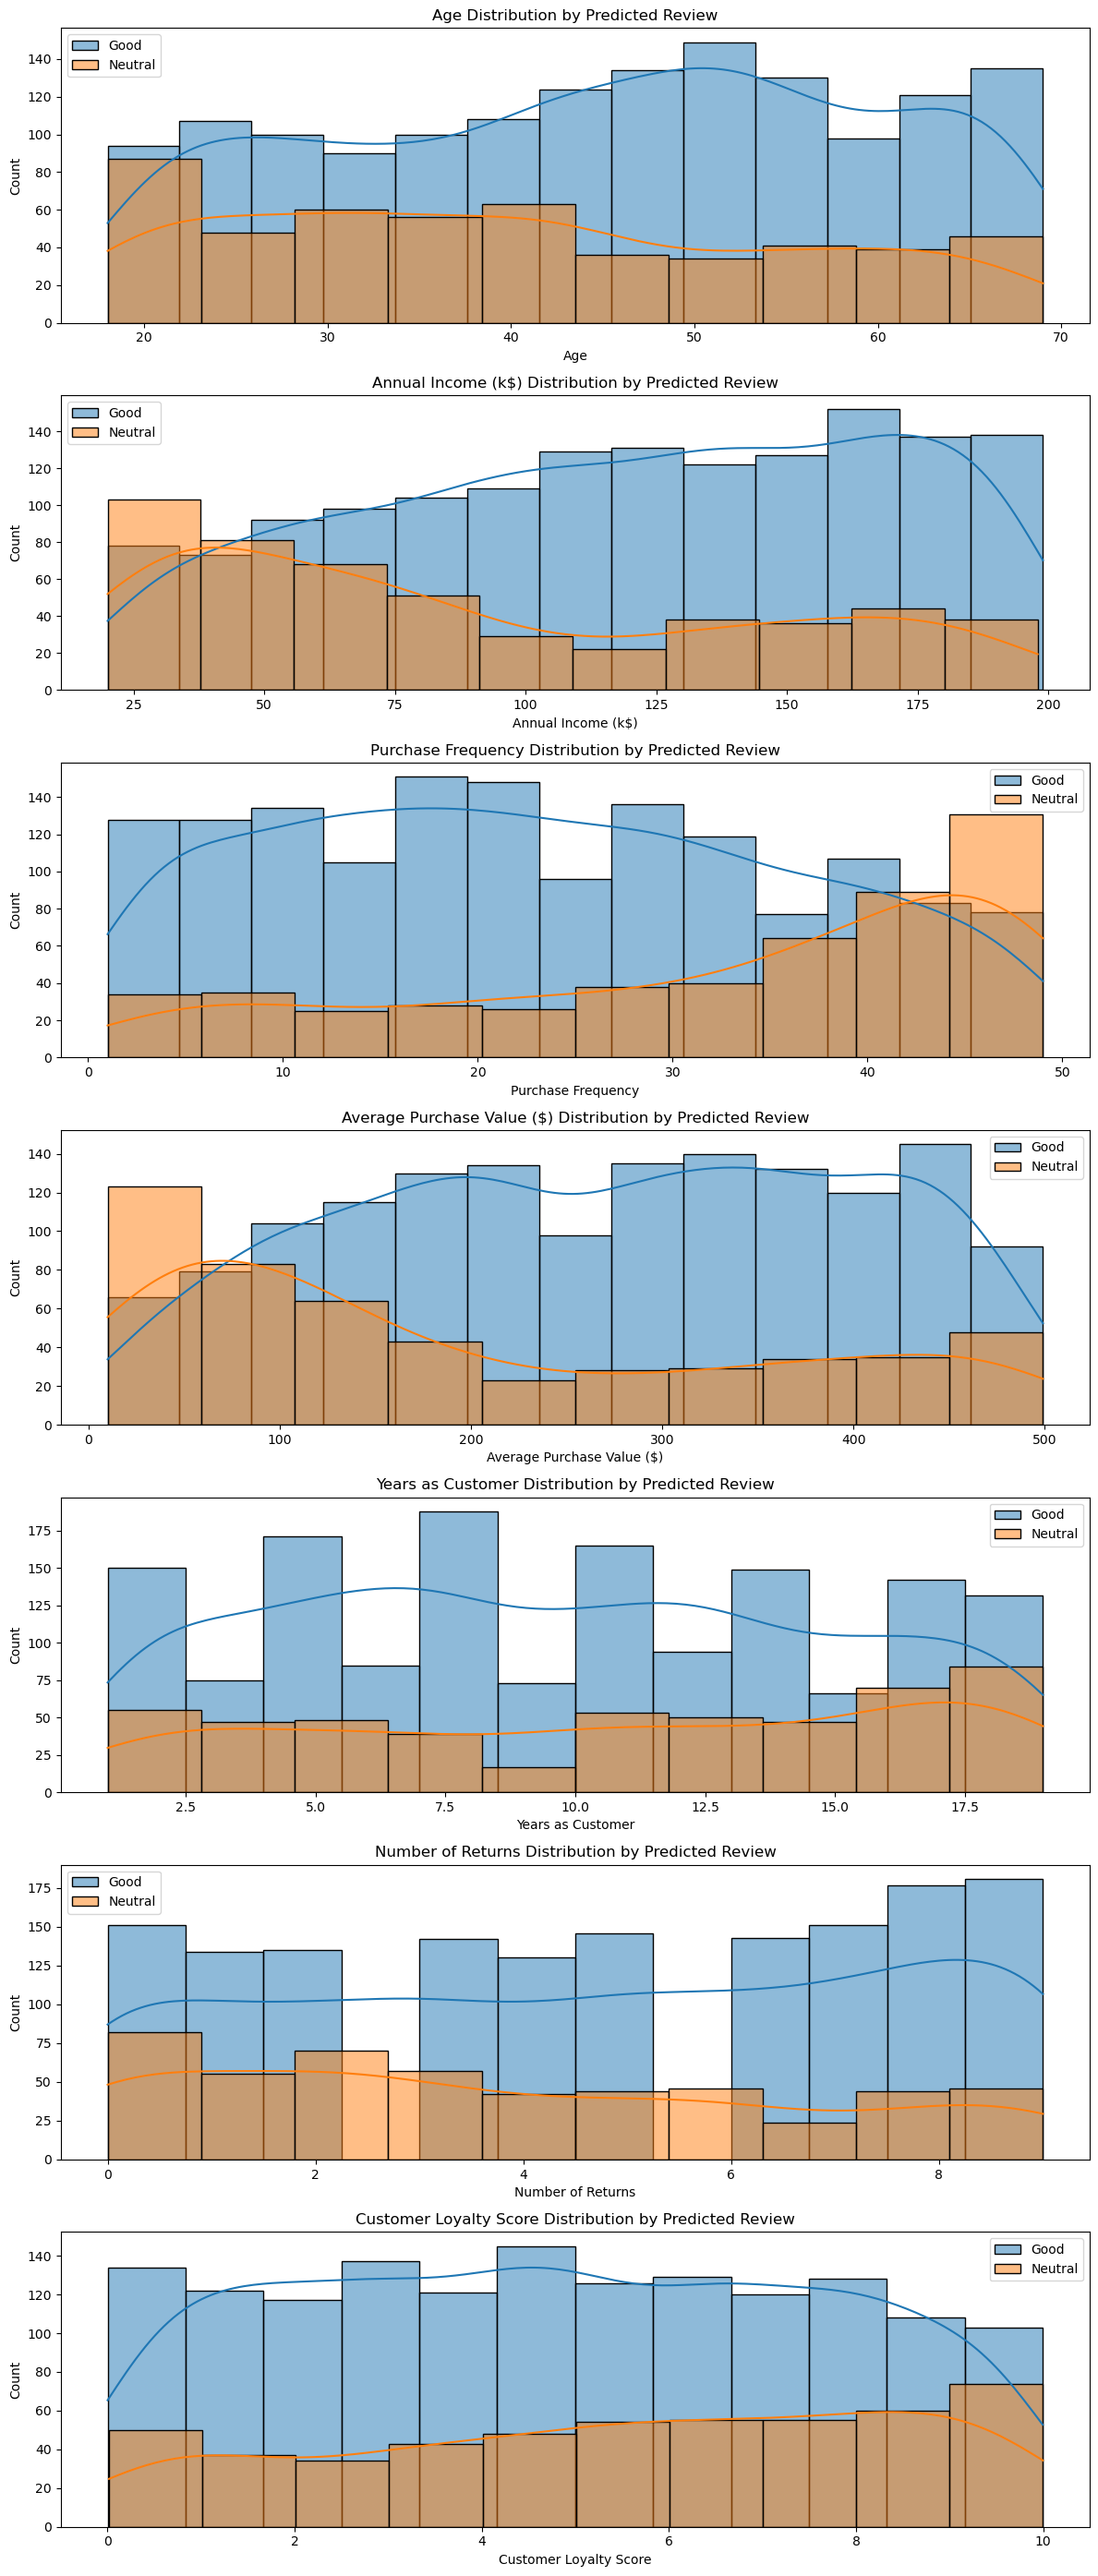

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the attributes excluding the target variable
attributes = df.columns[:-1]

# Set up subplots
fig, axes = plt.subplots(nrows=len(attributes), ncols=1, figsize=(12, 4 * len(attributes)))

# Iterate over each attribute and create histograms grouped by Predicted Review
for i, attribute in enumerate(attributes):
    for review in df['Predicted Review'].unique():
        sns.histplot(df[df['Predicted Review']==review][attribute], kde=True, label=review, ax=axes[i])
    axes[i].set_title(f'{attribute} Distribution by Predicted Review')
    axes[i].legend()

plt.tight_layout()
plt.show()


# Potential impact of each feature on the predicted review

1. Age:
Older customers are a more likely to give a positive review and less likely to have neutral reviews.

2. Annual Income:
Higher annual income contributes to more positive reviews and less neutral reviews.

3. Purchase Frequency:
Less frequent purchases are associated with positive reviews and more frequent purchases are associated with neutral reviews.

4. Average Purchase Value:
Average purchase value of $200 to $450 contribute to more positive reviews and low average purchase contributes more neutral reviews.

5. Years as Customer:
Years as customer doesn't have much impact on reviews.

6. Number of Returns:
A number of returns higher than 6 has accumulated more positive reviews and less neutral reviews.

7. Customer Loyalty Score:
Less positive reviews and more neutral reviews are given by customers with loyalty scores of 9 to 10.

# How different features might influence a customer’s review

1. Age: Age might influence a customer's review sentiment. Older customers may have different expectations or perspectives compared to younger customers. For example, older customers might value traditional aspects of a product or service.

2. Annual Income: Annual income can influence a customer's review by affecting their purchasing power and expectations. Higher-income customers might expect premium products or services, while lower-income customers may prioritize affordability.

3. Purchase Frequency: The frequency of purchases may reflect a customer's engagement and satisfaction. Higher purchase frequency might indicate loyalty and satisfaction, leading to positive reviews, while infrequent purchases might result in reviews expressing dissatisfaction.

4. Average Purchase Value: The average purchase value can impact reviews by reflecting the perceived value for money. Customers who believe they receive good value for higher-priced items may provide positive reviews, while those who feel they are not getting value may leave negative feedback.

5. Years as Customer: Longer customer relationships can foster positive sentiments. Customers who have been with a business for an extended period are more likely to have experienced consistent service, leading to positive reviews, while newer customers may base their reviews on initial impressions.

6. Number of Returns: The number of returns is a critical factor. A higher number of returns might signal dissatisfaction or issues with the products or services, leading to negative reviews. Fewer returns may indicate higher satisfaction.

7. Customer Loyalty Score: Loyalty scores directly indicate the level of customer satisfaction and loyalty. Higher loyalty scores are likely to result in positive reviews, while lower scores might lead to negative or neutral reviews, indicating potential areas for improvement.

# Neural network model

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Assuming 'df' is your dataset
features = df.drop('Predicted Review', axis=1).values
labels = df['Predicted Review'].values

# Convert labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=20)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor, X_test_tensor = map(torch.tensor, (X_train_normalized, X_test_normalized))
y_train_tensor, y_test_tensor = map(torch.tensor, (y_train, y_test))

# Define the neural network model
class FFN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FFN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.fc4(x), dim=1)
        return x

# Instantiate the model, loss function, and optimizer
model = FFN(X_train_tensor.shape[1], len(label_encoder.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 2000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor.float())
    loss = criterion(outputs, y_train_tensor.long())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor.float())
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy.item()}')


Epoch: 0, Loss: 0.6509761810302734
Epoch: 100, Loss: 0.4890576899051666
Epoch: 200, Loss: 0.4250865578651428
Epoch: 300, Loss: 0.3743892014026642
Epoch: 400, Loss: 0.35451045632362366
Epoch: 500, Loss: 0.3445774018764496
Epoch: 600, Loss: 0.3394097089767456
Epoch: 700, Loss: 0.3357622027397156
Epoch: 800, Loss: 0.33370548486709595
Epoch: 900, Loss: 0.33258897066116333
Epoch: 1000, Loss: 0.3319893181324005
Epoch: 1100, Loss: 0.331637978553772
Epoch: 1200, Loss: 0.3314148187637329
Epoch: 1300, Loss: 0.33126556873321533
Epoch: 1400, Loss: 0.3311609923839569
Epoch: 1500, Loss: 0.33108529448509216
Epoch: 1600, Loss: 0.33102816343307495
Epoch: 1700, Loss: 0.3309842646121979
Epoch: 1800, Loss: 0.33094996213912964
Epoch: 1900, Loss: 0.33092251420021057
Test Accuracy: 0.9150000214576721


In [18]:
import torch
from sklearn.metrics import accuracy_score, classification_report

# Set the model to evaluation mode
model.eval()

# Convert the test data to PyTorch tensor
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)

# Make predictions
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_pred_tensor = torch.max(outputs, 1)
    y_pred = y_pred_tensor.numpy()

# Convert y_test_tensor to a NumPy array
y_test = y_test_tensor.numpy()

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.915
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       298
           1       0.84      0.82      0.83       102

    accuracy                           0.92       400
   macro avg       0.89      0.88      0.89       400
weighted avg       0.91      0.92      0.91       400



# Analysis of Neural Network Model

Accuracy: 0.915
The model correctly predicted the class for approximately 91.5% of the samples in the test set.

Precision:
Class 0 (Good Review): Precision of 0.94
Among the instances predicted as "Good," 94% were actually "Good."
Class 1 (Neutral Review): Precision of 0.84
Among the instances predicted as "Neutral," 84% were actually "Neutral."

Recall (Sensitivity):
Class 0 (Good Review): Recall of 0.95
Out of all the actual "Good" instances, the model correctly identified 95%.
Class 1 (Neutral Review): Recall of 0.82
Out of all the actual "Neutral" instances, the model correctly identified 82%.

F1-Score:
Class 0 (Good Review): F1-Score of 0.94
An F1-Score of 0.94 indicates a good balance between precision and recall for "Good" reviews.
Class 1 (Neutral Review): F1-Score of 0.83
An F1-Score of 0.83 indicates a good balance between precision and recall for "Neutral" reviews.

Support:
Class 0 (Good Review): Support of 298
There were 298 instances of "Good" reviews in the test set.
Class 1 (Neutral Review): Support of 102
There were 102 instances of "Neutral" reviews in the test set.

This interpretation takes into account the distinction between "Good" and "Neutral" reviews. Overall, the model demonstrates a good ability to classify both "Good" and "Neutral" instances, with high precision, recall, and F1-Scores for both classes.